Apply K-Means Clustering to an unlabeled dataset (e.g., customer segmentation). Use
the "Elbow Method" to determine a reasonable number of clusters (K). Visualize the
final clusters and provide a descriptive interpretation of the characteristics of each
cluster.

1. Setup and Data Preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# --- 1. Load and Prepare Data ---

# Load the dataset
url = 'https://raw.githubusercontent.com/kennedykwangari/Mall-Customer-Segmentation-Data/master/Mall_Customers.csv'
df = pd.read_csv(url)

# Rename columns for simplicity
df = df.rename(columns={
    'Annual Income (k$)': 'Income',
    'Spending Score (1-100)': 'SpendingScore'
})

print("--- Data Head ---")
print(df.head())

# Select the features for clustering
# We'll use 'Income' and 'SpendingScore' for a 2D visualization
X = df[['Income', 'SpendingScore']]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

--- Data Head ---
   CustomerID  Gender  Age  Income  SpendingScore
0           1    Male   19      15             39
1           2    Male   21      15             81
2           3  Female   20      16              6
3           4  Female   23      16             77
4           5  Female   31      17             40


2. Using the Elbow Method to Find 'K'


--- Running Elbow Method ---


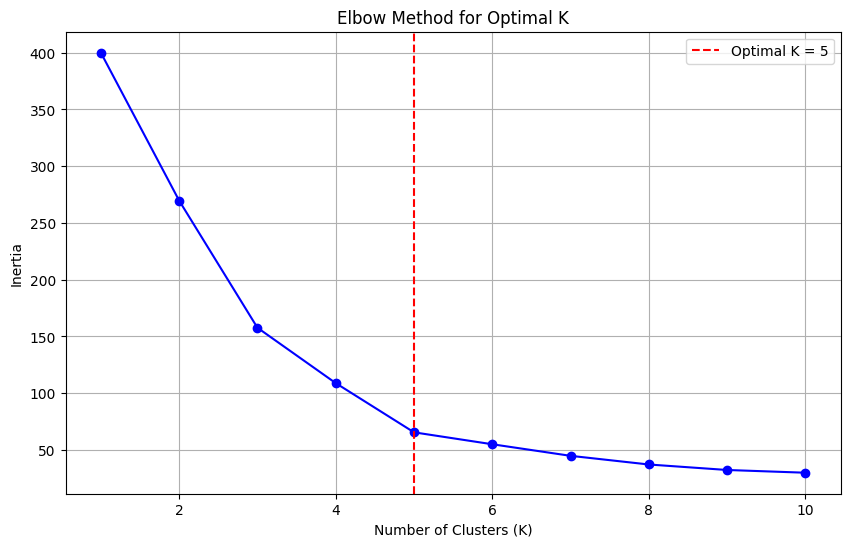

In [2]:
# --- 2. Use the Elbow Method to Find Optimal K ---
inertia = []
k_range = range(1, 11)  # Test K from 1 to 10

print("\n--- Running Elbow Method ---")
for k in k_range:
    # n_init=10 runs the algorithm 10 times with different centroid seeds
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, 'bo-') # 'bo-' creates a blue line with circle markers
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.axvline(x=5, color='red', linestyle='--', label='Optimal K = 5')
plt.legend()
plt.show()

3. Final Clustering and Visualization

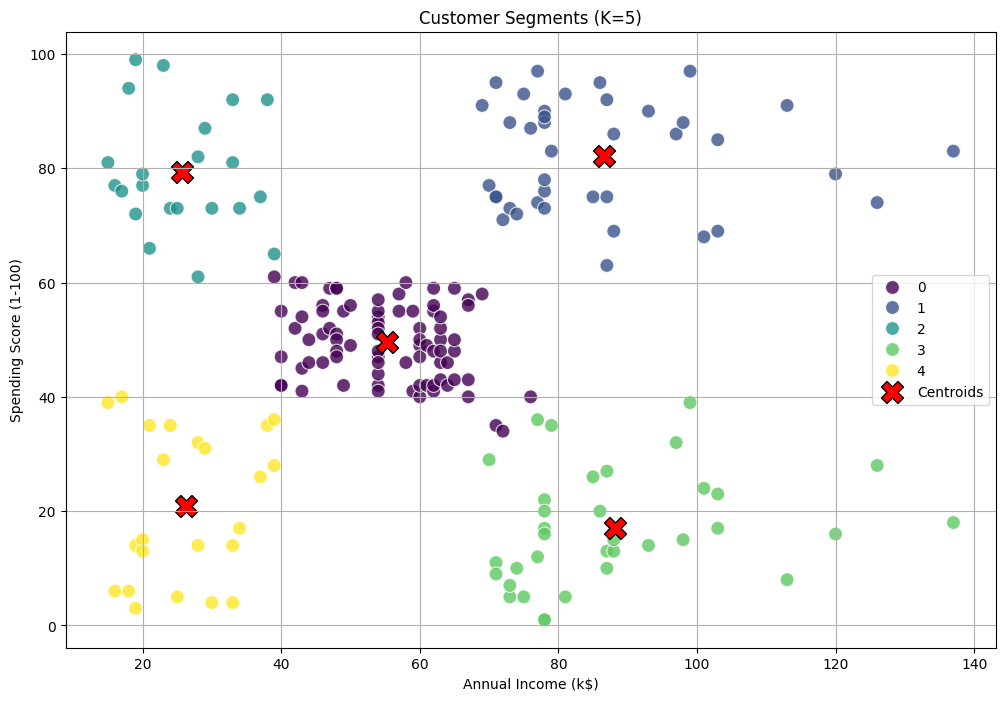

In [3]:
# --- 3. Fit Final Model and Visualize Clusters ---

optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X_scaled)

# Add the cluster labels back to our original DataFrame
df['Cluster'] = y_kmeans

# Get the coordinates of the cluster centroids (in the original, unscaled values)
centroids = scaler.inverse_transform(kmeans.cluster_centers_)

# Plot the final clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Income', y='SpendingScore', hue='Cluster', 
                palette='viridis', s=100, alpha=0.8)

# Plot the centroids
plt.scatter(centroids[:, 0], centroids[:, 1], s=250, c='red', marker='X', 
            label='Centroids', ec='black')

plt.title(f'Customer Segments (K={optimal_k})')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()

4. Interpretation of Clusters

In [4]:
# --- 4. Interpret the Clusters ---
print("\n--- Cluster Characteristics (Mean Values) ---")
# We group by 'Cluster' and find the mean of the original features
cluster_analysis = df.groupby('Cluster')[['Income', 'SpendingScore', 'Age']].mean().round(2)
print(cluster_analysis)


--- Cluster Characteristics (Mean Values) ---
         Income  SpendingScore    Age
Cluster                              
0         55.30          49.52  42.72
1         86.54          82.13  32.69
2         25.73          79.36  25.27
3         88.20          17.11  41.11
4         26.30          20.91  45.22
